In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [3]:
df = pd.read_csv('day11_model_comparison_and_stacking.csv')
df

Feature1  Feature2  Feature3  Feature4  Feature5  Target
0    0.496714  6.852355  1.674826        42         1       0
1   -0.138264  8.818833  1.045678         0         0       0
2    0.647689  2.202865  6.364302        50         1       1
3    1.523030  6.125938  7.064757        23         1       1
4   -0.234153  3.698715  0.315861        98         0       0
..        ...       ...       ...       ...       ...     ...
495  0.538910  4.437799  7.374338        45         1       1
496 -1.037246  8.595373  5.122219        15         1       0
497 -0.190339  6.281686  6.802278         0         0       0
498 -0.875618  3.857642  0.416729        62         0       0
499 -1.382800  6.145166  0.847920        20         1       0

[500 rows x 6 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  500 non-null    float64
 1   Feature2  500 non-null    float64
 2   Feature3  500 non-null    float64
 3   Feature4  500 non-null    int64  
 4   Feature5  500 non-null    int64  
 5   Target    500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


In [5]:
df.describe()

Feature1    Feature2    Feature3    Feature4    Feature5      Target
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000
mean     0.006838    5.063652    5.021798   47.344000    0.314000    0.500000
std      0.981253    1.955994    2.896086   29.547721    0.464581    0.500501
min     -3.241267   -0.393773    0.049400    0.000000    0.000000    0.000000
25%     -0.700307    3.809417    2.387711   20.000000    0.000000    0.000000
50%      0.012797    5.057063    5.108220   46.000000    0.000000    0.500000
75%      0.636783    6.302485    7.365199   73.000000    1.000000    1.000000
max      3.852731   10.264764    9.994137   99.000000    1.000000    1.000000

In [6]:
df.isnull().sum()

Feature1    0
Feature2    0
Feature3    0
Feature4    0
Feature5    0
Target      0
dtype: int64

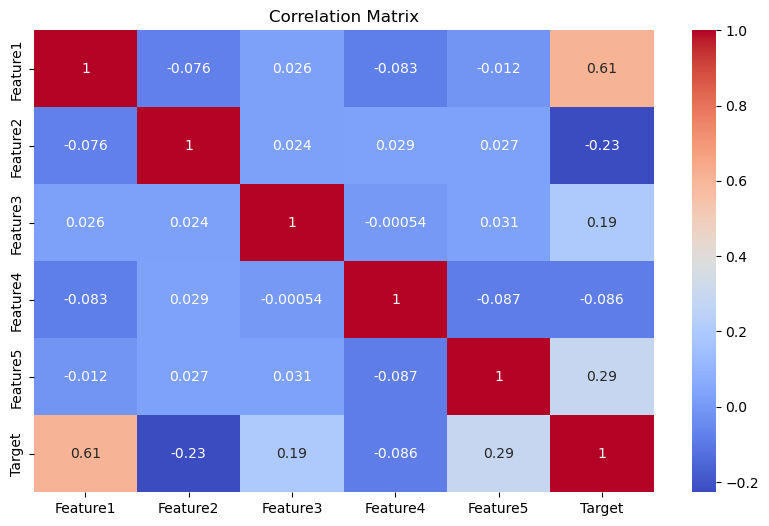

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
y = df['Target']
X = df.drop(columns='Target')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [16]:
print('Logistic Regression Results:')
print(confusion_matrix(y_test, lr_pred))
print(accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Logistic Regression Results:
[[45  4]
 [ 5 46]]
0.91
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.92      0.90      0.91        51

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



In [17]:
#Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = lr_model.predict(X_test)

In [18]:
print('Decision Tree Results:')
print(confusion_matrix(y_test, dt_pred))
print(accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Decision Tree Results:
[[45  4]
 [ 5 46]]
0.91
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.92      0.90      0.91        51

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

